***
# <font color=forestgreen size=10>INTRODUÇÃO</font>
- Arquivo	: notebook.ipynb
- Título	: Exercício 2 - Disciplina de Redes Neurais Artificiais (DELT/UFMG)
- Autor	    : Gustavo Augusto Ortiz de Oliveira (gstvortiz@hotmail.com) <br> <br> <br>
- Descrição: 
texto**
***

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [18]:
def PrepararDados(dados, col = 'y'):
    X = dados.drop(col, axis = 1).values
    y = dados[col].values
    return X, y

In [19]:
class Figure():
    def __init__(self, fs = (10, 7), xlim = (-3, 8), ylim = (-3, 8)):
        self.fs = fs
        self.xlim = xlim
        self.ylim = ylim

    def PlanoCartesiano(self):
        fig, ax = plt.subplots(figsize=self.fs)
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(self.xlim[0], self.xlim[1])
        ax.set_ylim(self.ylim[0], self.ylim[1])
        return fig, ax

***
# <font color=seagreen size=10>CONHECENDO DADOS</font>
***

## 1. GERANDO DADOS ALEATÓRIOS

<Axes: >

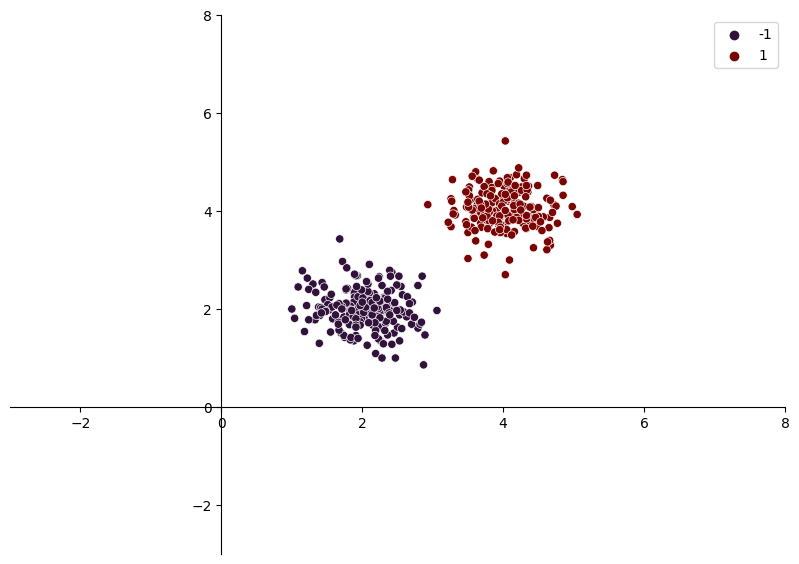

In [20]:
dados = pd.read_csv('data/samples.csv')
X, y = PrepararDados(dados)

fig, ax = Figure().PlanoCartesiano()
sns.scatterplot(x = X[:, 1], y = X[:, 2], hue = y, palette = 'turbo', ax = ax)

## 2. CLASSE

In [21]:
class LeastSquares:
    def __init__(self):
        self.w = None
    
    def fit(self, X, y):
        self.w = np.linalg.pinv(X).dot(y)
        return self.w
    
    def predict(self, X):
        return X.dot(self.w)

In [22]:
class DeltaRuleClassifier:
    def __init__(self, lr=0.01, n_iters=100):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.func = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.rand(n_features)
        for _ in range(self.n_iters):
            perm = np.random.permutation(n_samples)
            X, y = X[perm], y[perm]
            J = 0
            for Xi, yi in zip(X, y):
                ŷ = self.predict(Xi)
                e = yi - self.func(ŷ)
                J += e ** 2
                delta = self.lr * e * Xi
                self.w += delta
            if J < 0.01: break
        return self.w

    def predict(self, X):
        return self.func(X.dot(self.w))

class Adaline(DeltaRuleClassifier):
    def __init__(self):
        super().__init__()
        self.func = lambda ŷ: ŷ

class Perceptron(DeltaRuleClassifier):
    def __init__(self):
        super().__init__()
        self.func = lambda ŷ: np.where(ŷ > 0, 1, -1)

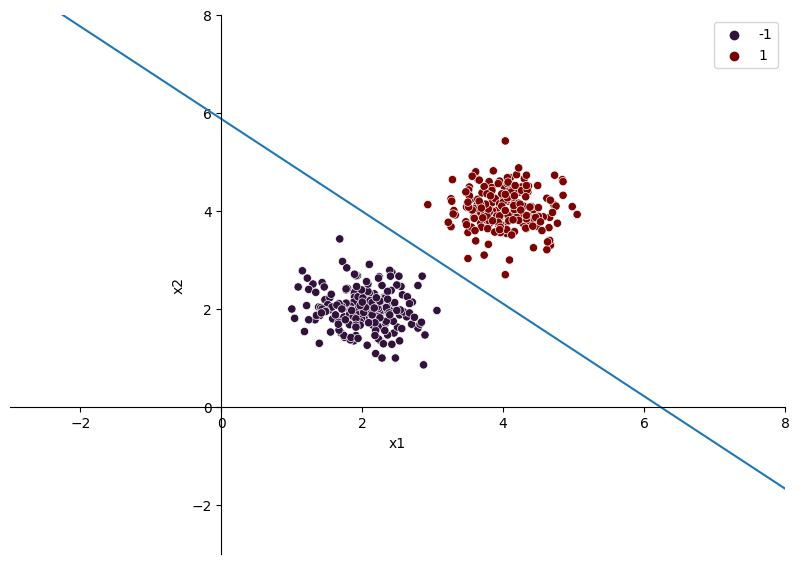

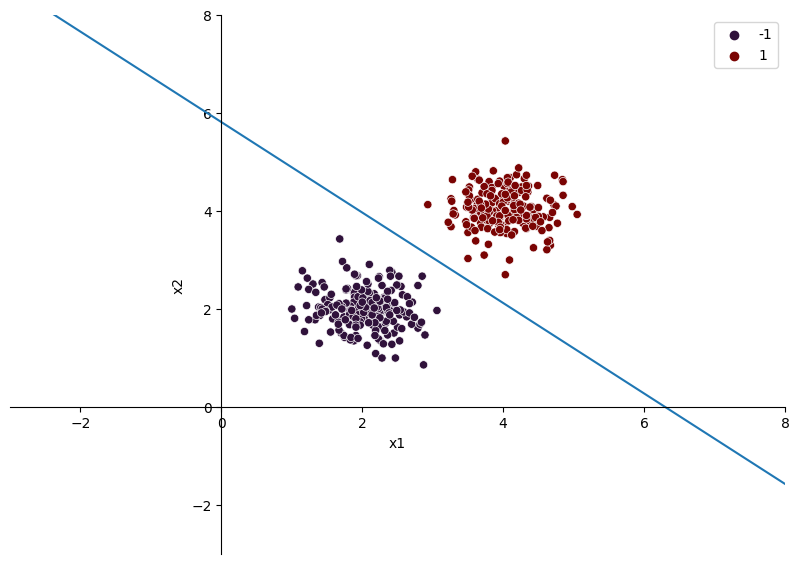

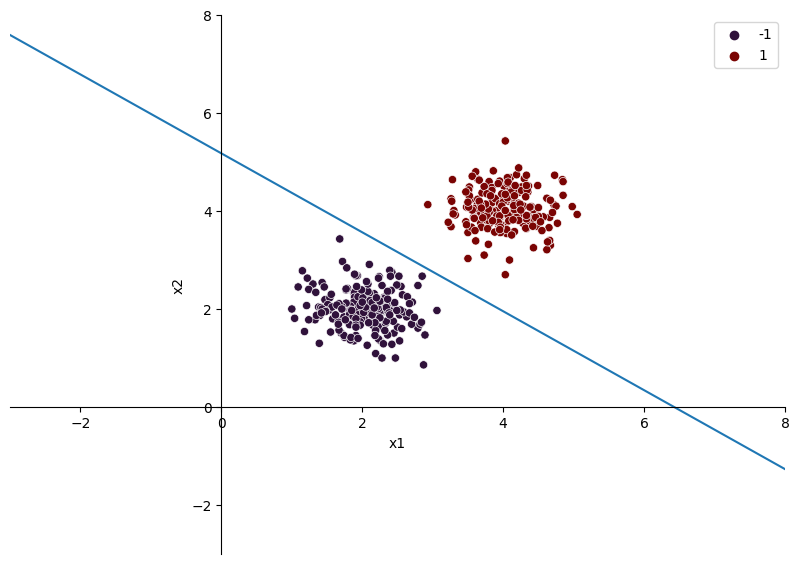

In [23]:
def Scatter(data, w):
    fig, ax = Figure().PlanoCartesiano()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    y = (-w[1]*x-w[0])/w[2]
    sns.scatterplot(data = data, x = 'x1', y = 'x2', hue = 'y', palette = 'turbo', ax = ax)
    sns.lineplot(x = x, y = y)
    plt.show()

Neuronios = [LeastSquares(), Adaline(), Perceptron()]
for Neuronio in Neuronios:
    Scatter(dados, Neuronio.fit(X, y))